In [26]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

custom_params = {"xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "font.family":"Helvetica",
                 "font.size":12.0,
                 "legend.frameon":False,
                 "legend.labelspacing":0}

sns.set_theme(style='ticks', rc=custom_params)

In [27]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both'

### Quantum Thermostat Testing
#### CMD

In [28]:
def Import_Angles(directory):
    # Get list of file names in the directory
    file_names = os.listdir(directory)
    imports = []
    # Import each file
    for file_name in file_names:
        # Remove file extension
        module_name = os.path.splitext(file_name)[0]
        imports.append(module_name)
        # Import file
        globals()[module_name] = pd.read_csv(os.path.join(directory, file_name), delim_whitespace=True, header=None, names=['HOH', 'Count'])
    return imports

def Import_BondLengths(directory):
    # Get list of file names in the directory
    file_names = os.listdir(directory)
    imports = []
    # Import each file
    for file_name in file_names:
        # Remove file extension
        module_name = os.path.splitext(file_name)[0]
        imports.append(module_name)
        # Import file
        globals()[module_name] = pd.read_csv(os.path.join(directory, file_name), delim_whitespace=True, header=None, names=['rOH', 'Count'])
        globals()[module_name] = globals()[module_name].sort_values('rOH', ascending=True)
    return imports

In [29]:
imported_angles = []
locs = ['CMD', 'CMD_QT', 'PIGLE_2', 'PIGLE_4', 'PIGLE_8', 'PIMD_4', 'PIMD_8', 'PIMD_16', 'PIMD_32']
for loc in locs:
    imported_angles.append(Import_Angles('Data\Angles\qTIP4P\{}'.format(loc)))
for sublist in imported_angles:
    print(sublist)

['CMD_ang_1000', 'CMD_ang_300', 'CMD_ang_500']
['CMD_QT_ang_1000', 'CMD_QT_ang_300', 'CMD_QT_ang_500']
['PIGLE_2_ang_1000', 'PIGLE_2_ang_500', 'PIGLE_2_noPAPER_ang_300', 'PIGLE_2_PAPER_ang_300']
['PIGLE_4_ang_1000', 'PIGLE_4_ang_300', 'PIGLE_4_ang_500']
['PIGLE_8_ang_300']
['PIMD_4_ang_1000', 'PIMD_4_ang_300', 'PIMD_4_ang_500']
['PIMD_8_ang_1000', 'PIMD_8_ang_300', 'PIMD_8_ang_500']
['PIMD_16_ang_1000', 'PIMD_16_ang_300', 'PIMD_16_ang_500']
['PIMD_32_ang_1000', 'PIMD_32_ang_300', 'PIMD_32_ang_500']


In [30]:
imported_lengths = []
locs = ['CMD', 'CMD_QT', 'PIGLE_2', 'PIGLE_4', 'PIGLE_8', 'PIMD_4', 'PIMD_8', 'PIMD_16', 'PIMD_32']
for loc in locs:
    imported_lengths.append(Import_BondLengths('Data\Bond_Lengths\qTIP4P\{}'.format(loc)))
for sublist in imported_lengths:
    print(sublist)

['CMD_dist_1000', 'CMD_dist_300', 'CMD_dist_500']
['CMD_QT_dist_1000', 'CMD_QT_dist_300', 'CMD_QT_dist_500']
['PIGLE_2_dist_1000', 'PIGLE_2_dist_500', 'PIGLE_2_noPAPER_dist_300', 'PIGLE_2_PAPER_dist_300']
['PIGLE_4_dist_1000', 'PIGLE_4_dist_300', 'PIGLE_4_dist_500']
['PIGLE_8_dist_300']
['PIMD_4_dist_1000', 'PIMD_4_dist_300', 'PIMD_4_dist_500']
['PIMD_8_dist_1000', 'PIMD_8_dist_300', 'PIMD_8_dist_500']
['PIMD_16_dist_1000', 'PIMD_16_dist_300', 'PIMD_16_dist_500']
['PIMD_32_dist_1000', 'PIMD_32_dist_300', 'PIMD_32_dist_500']


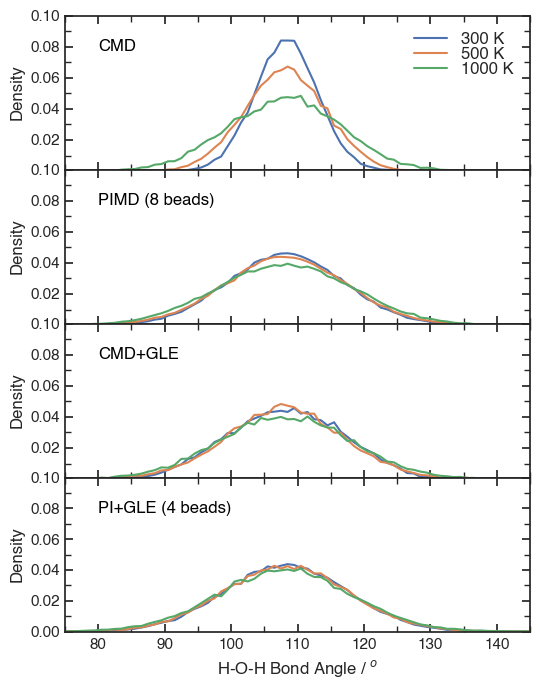

In [31]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(6,8))

methods_list = ['CMD', 'PIMD (8 beads)', 'CMD+GLE', 'PI+GLE (4 beads)']

# Plot for CMD
axs[0].plot(CMD_ang_300['HOH'], CMD_ang_300['Count'], label='300 K')
axs[0].plot(CMD_ang_500['HOH'], CMD_ang_500['Count'], label='500 K')
axs[0].plot(CMD_ang_1000['HOH'], CMD_ang_1000['Count'], label='1000 K')
axs[0].legend(frameon=False, labelspacing=0, fontsize=12)

# Plot for PIMD_8
axs[1].plot(PIMD_8_ang_300['HOH'], PIMD_8_ang_300['Count'], label='300 K')
axs[1].plot(PIMD_8_ang_500['HOH'], PIMD_8_ang_500['Count'], label='500 K')
axs[1].plot(PIMD_8_ang_1000['HOH'], PIMD_8_ang_1000['Count'], label='1000 K')

# Plot for CMD_QT
axs[2].plot(CMD_QT_ang_300['HOH'], CMD_QT_ang_300['Count'], label='300 K')
axs[2].plot(CMD_QT_ang_500['HOH'], CMD_QT_ang_500['Count'], label='500 K')
axs[2].plot(CMD_QT_ang_1000['HOH'], CMD_QT_ang_1000['Count'], label='1000 K')

# Plot for PIGLE_4
axs[3].plot(PIGLE_4_ang_300['HOH'], PIGLE_4_ang_300['Count'], label='300 K')
axs[3].plot(PIGLE_4_ang_500['HOH'], PIGLE_4_ang_500['Count'], label='500 K')
axs[3].plot(PIGLE_4_ang_1000['HOH'], PIGLE_4_ang_1000['Count'], label='1000 K')
axs[3].set_xlabel(r'H-O-H Bond Angle / $^o$', fontsize=12)
axs[3].set_ylim(0, 0.1)


for x in range(3): axs[x].set_ylim(0.001, 0.1)
for x in range(4):
    axs[x].set_xlim(75, 145)
    axs[x].set_ylabel('Density', fontsize=12)
    axs[x].xaxis.set_minor_locator(MultipleLocator(5))
    axs[x].yaxis.set_minor_locator(MultipleLocator(0.01))
    axs[x].text(80, 0.075, methods_list[x], ha='left', va='bottom', fontsize=12, color='black')
    
plt.subplots_adjust(hspace=0)
plt.savefig('Plots/BondAngle_Final.png', dpi=200)


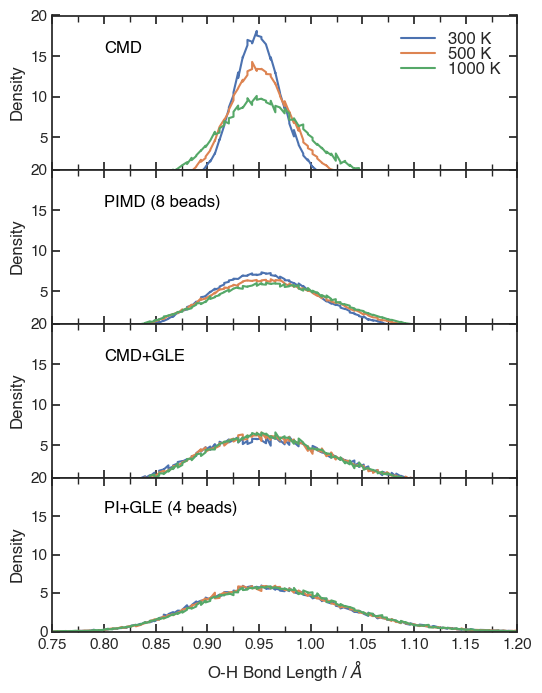

In [32]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(6,8))

methods_list = ['CMD', 'PIMD (8 beads)', 'CMD+GLE', 'PI+GLE (4 beads)']

# Plot for CMD
axs[0].plot(CMD_dist_300['rOH'], CMD_dist_300['Count'], label='300 K')
axs[0].plot(CMD_dist_500['rOH'], CMD_dist_500['Count'], label='500 K')
axs[0].plot(CMD_dist_1000['rOH'], CMD_dist_1000['Count'], label='1000 K')
axs[0].legend(frameon=False, labelspacing=0, fontsize=12)

# Plot for PIMD_8
axs[1].plot(PIMD_8_dist_300['rOH'], PIMD_8_dist_300['Count'], label='300 K')
axs[1].plot(PIMD_8_dist_500['rOH'], PIMD_8_dist_500['Count'], label='500 K')
axs[1].plot(PIMD_8_dist_1000['rOH'], PIMD_8_dist_1000['Count'], label='1000 K')

# Plot for CMD_QT
axs[2].plot(CMD_QT_dist_300['rOH'], CMD_QT_dist_300['Count'], label='300 K')
axs[2].plot(CMD_QT_dist_500['rOH'], CMD_QT_dist_500['Count'], label='500 K')
axs[2].plot(CMD_QT_dist_1000['rOH'], CMD_QT_dist_1000['Count'], label='1000 K')

# Plot for PIGLE_4
axs[3].plot(PIGLE_4_dist_300['rOH'], PIGLE_4_dist_300['Count'], label='300 K')
axs[3].plot(PIGLE_4_dist_500['rOH'], PIGLE_4_dist_500['Count'], label='500 K')
axs[3].plot(PIGLE_4_dist_1000['rOH'], PIGLE_4_dist_1000['Count'], label='1000 K')
axs[3].set_xlabel(r'O-H Bond Length / $\AA$', fontsize=12)
axs[3].set_ylim(0, 20)

for x in range(3): axs[x].set_ylim(1, 20)
for x in range(4):
    axs[x].set_xlim(0.75, 1.2)
    axs[x].set_ylabel('Density', fontsize=12)
    axs[x].xaxis.set_minor_locator(MultipleLocator(0.025))
    axs[x].yaxis.set_minor_locator(MultipleLocator(5))
    axs[x].text(0.8, 15, methods_list[x], ha='left', va='bottom', fontsize=12, color='black')
    
plt.subplots_adjust(hspace=0)
plt.savefig('Plots/BondDistance_Final.png', dpi=200)


### Presentation Plots

In [40]:
custom_params = {"axes.labelsize": 16.0,
                 "xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "xtick.labelsize":16.0,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "ytick.labelsize":16.0,
                 "font.family":"Helvetica",
                 "font.size":16.0,
                 "lines.linewidth":2,
                 "legend.frameon":False,
                 "legend.labelspacing":0,
                 "legend.borderpad":0.5,
                 "legend.fontsize":16.0}

sns.set_theme(style='ticks', rc=custom_params)

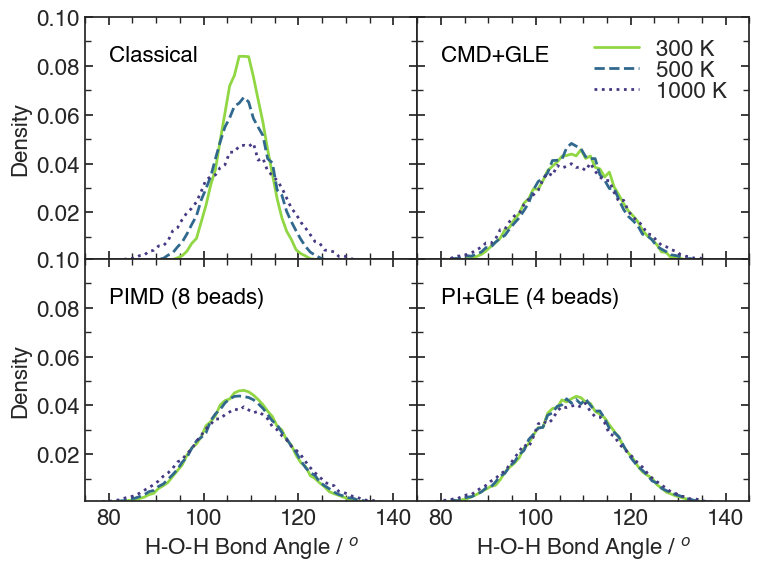

In [37]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,6))

methods_list = ['Classical', 'PIMD (8 beads)', 'CMD+GLE', 'PI+GLE (4 beads)']

# Plot for CMD
axs[0][0].plot(CMD_ang_300['HOH'], CMD_ang_300['Count'], label='300 K', color='#90d743')
axs[0][0].plot(CMD_ang_500['HOH'], CMD_ang_500['Count'], label='500 K', color='#31688e', linestyle='--')
axs[0][0].plot(CMD_ang_1000['HOH'], CMD_ang_1000['Count'], label='1000 K', color='#443983', linestyle=':')
axs[0][0].set_ylabel('Density', fontsize=16)
axs[0][0].text(80, 0.08, methods_list[0], ha='left', va='bottom', fontsize=16, color='black')

# Plot for PIMD_8
axs[1][0].plot(PIMD_8_ang_300['HOH'], PIMD_8_ang_300['Count'], label='300 K', color='#90d743')
axs[1][0].plot(PIMD_8_ang_500['HOH'], PIMD_8_ang_500['Count'], label='500 K', color='#31688e', linestyle='--')
axs[1][0].plot(PIMD_8_ang_1000['HOH'], PIMD_8_ang_1000['Count'], label='1000 K', color='#443983', linestyle=':')
axs[1][0].set_ylabel('Density', fontsize=16)
axs[1][0].text(80, 0.08, methods_list[1], ha='left', va='bottom', fontsize=16, color='black')
axs[1][0].set_xlabel(r'H-O-H Bond Angle / $^o$')


# Plot for CMD_QT
axs[0][1].plot(CMD_QT_ang_300['HOH'], CMD_QT_ang_300['Count'], label='300 K', color='#90d743')
axs[0][1].plot(CMD_QT_ang_500['HOH'], CMD_QT_ang_500['Count'], label='500 K', color='#31688e', linestyle='--')
axs[0][1].plot(CMD_QT_ang_1000['HOH'], CMD_QT_ang_1000['Count'], label='1000 K', color='#443983', linestyle=':')
axs[0][1].text(80, 0.08, methods_list[2], ha='left', va='bottom', fontsize=16, color='black')
axs[0][1].legend(frameon=False, labelspacing=0)

# Plot for PIGLE_4
axs[1][1].plot(PIGLE_4_ang_300['HOH'], PIGLE_4_ang_300['Count'], label='300 K', color='#90d743')
axs[1][1].plot(PIGLE_4_ang_500['HOH'], PIGLE_4_ang_500['Count'], label='500 K', color='#31688e', linestyle='--')
axs[1][1].plot(PIGLE_4_ang_1000['HOH'], PIGLE_4_ang_1000['Count'], label='1000 K', color='#443983', linestyle=':')
axs[1][1].set_xlabel(r'H-O-H Bond Angle / $^o$')
axs[1][1].set_ylim(0, 0.1)
axs[1][1].text(80, 0.08, methods_list[3], ha='left', va='bottom', color='black')

for x in range(2):
    for y in range(2):
        axs[x][y].set_xlim(75, 145)
        axs[x][y].xaxis.set_minor_locator(MultipleLocator(5))
        axs[x][y].yaxis.set_minor_locator(MultipleLocator(0.01))


for x in range(2): axs[x][0].set_ylim(0.001, 0.1)

plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('Plots/Presentation/BondAngle_Presentation.png', dpi=200)

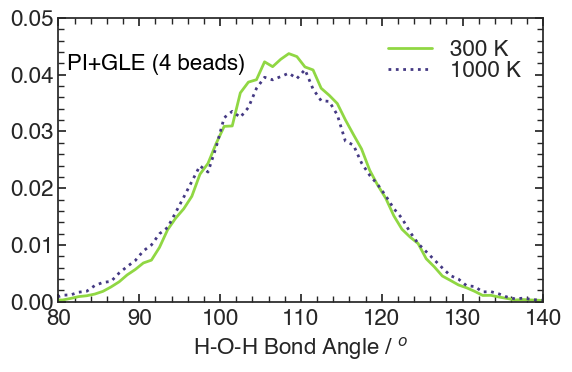

In [38]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(6,4))
ax.plot(PIGLE_4_ang_300['HOH'], PIGLE_4_ang_300['Count'], label='300 K', color='#90d743')
#ax.plot(PIGLE_4_ang_500['HOH'], PIGLE_4_ang_500['Count'], label='500 K', color='#31688e', linestyle='--')
ax.plot(PIGLE_4_ang_1000['HOH'], PIGLE_4_ang_1000['Count'], label='1000 K', color='#443983', linestyle=':')
ax.set_xlabel(r'H-O-H Bond Angle / $^o$')
ax.set_xlim(80,140)
ax.set_ylim(0, 0.05)
ax.text(81, 0.04, methods_list[3], ha='left', va='bottom', color='black')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('Plots/Presentation/BondAngle_Presentation_PIGLE.png', dpi=200)